In [1]:
import tsfresh as tsf
import glob
import os
import numpy as np
import pandas as pd
import seaborn as sns

from importlib import reload
from scipy import signal
from tqdm.auto import tqdm
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn import feature_selection, model_selection, metrics, dummy
from matplotlib import pyplot as plt
from src import main, feature_model

In [2]:
fp = np.random.choice(glob.glob('/home/hy180/projects/beat_pd/data/cis-pd/training_data/*.csv'))
samp_id = os.path.splitext(os.path.basename(fp))[0]
# fp = np.random.choice(glob.glob('data/cis-pd/training_data/training_samples/*/*.csv'))
# samp_id = os.path.basename(os.path.dirname(fp))
seq = main.read_seq(fp, t_colname='Timestamp', xyz_colnames=['X', 'Y', 'Z'], use_time_index=True)

label_cols = ['on_off', 'dyskinesia', 'tremor', 'subject_id']
labels = pd.read_csv('/home/hy180/projects/beat_pd/data/cis-pd/data_labels/CIS-PD_Training_Data_IDs_Labels.csv', index_col=0)

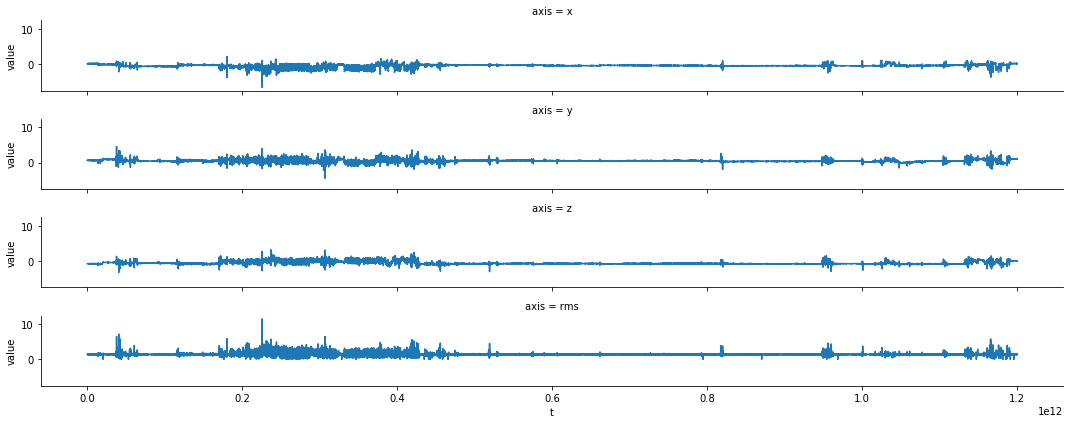

In [68]:
rms = np.sqrt(np.sum(np.square(seq), axis=1))
seq['rms'] = rms
seq = seq.interpolate(axis=0, limit=1, method='linear')

rms = np.sqrt(np.square(seq).sum(axis=1, skipna=False))
seq['rms'] = rms
plot_df = seq.reset_index().melt(value_vars=['x', 'y', 'z', 'rms'], value_name='value', var_name='axis', id_vars='t')
grid = sns.relplot(data=plot_df, row='axis', x='t', y='value', kind='line', aspect=10, height=1.5)

(-25, 25)

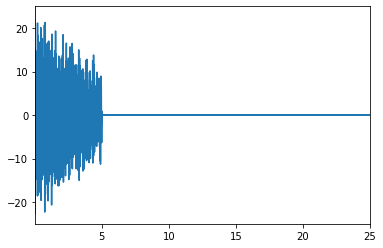

In [39]:
from numpy import fft

sp = fft.fft(rms)
sp[np.abs(freq) > 5] = 0
freq = np.fft.fftfreq(rms.shape[-1], d=1/50.)

plt.plot(freq, sp.real)
plt.xlim(0.04, 25)
plt.ylim(-25, 25)

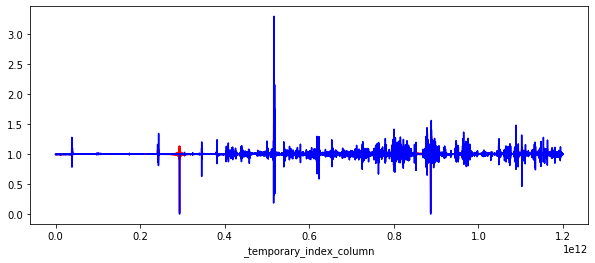

In [51]:
rec = fft.ifft(sp)
plt.figure(figsize=(10, 4))
sns.lineplot(df.index, rec.real, color='r')
sns.lineplot(df.index, rms.values, color='b')

In [13]:
df = pd.DataFrame(signal.decimate(rms, q=10))
df['id'] = samp_id
extracted_features = tsf.extract_features(df, column_id='id', disable_progressbar=False)


Feature Extraction: 100%|██████████| 1/1 [02:06<00:00, 126.46s/it]


NameError: name 'rows' is not defined

In [20]:
pd.concat(dfs)

,rms,id
00:00:00,1.024114,bd6ccdf7-901c-4c52-b41c-18372f291a18
00:00:00.100000,0.971180,bd6ccdf7-901c-4c52-b41c-18372f291a18
00:00:00.200000,1.029723,bd6ccdf7-901c-4c52-b41c-18372f291a18
00:00:00.300000,0.970820,bd6ccdf7-901c-4c52-b41c-18372f291a18
00:00:00.400000,1.016445,bd6ccdf7-901c-4c52-b41c-18372f291a18
...,...,...
00:19:59.500000,0.993422,5f2d1332-846c-48f6-a6ab-188d3737dcef
00:19:59.600000,0.996772,5f2d1332-846c-48f6-a6ab-188d3737dcef
00:19:59.700000,1.002342,5f2d1332-846c-48f6-a6ab-188d3737dcef
00:19:59.800000,0.998718,5f2d1332-846c-48f6-a6ab-188d3737dcef


In [23]:
tsf.extract_features(pd.concat(dfs), column_id='id', profile)


Feature Extraction: 100%|██████████| 5/5 [09:39<00:00, 115.97s/it]


variable,rms__abs_energy,rms__absolute_sum_of_changes,"rms__agg_autocorrelation__f_agg_""mean""__maxlag_40","rms__agg_autocorrelation__f_agg_""median""__maxlag_40","rms__agg_autocorrelation__f_agg_""var""__maxlag_40","rms__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","rms__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","rms__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","rms__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","rms__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,rms__symmetry_looking__r_0.9,rms__symmetry_looking__r_0.9500000000000001,rms__time_reversal_asymmetry_statistic__lag_1,rms__time_reversal_asymmetry_statistic__lag_2,rms__time_reversal_asymmetry_statistic__lag_3,rms__value_count__value_-1,rms__value_count__value_0,rms__value_count__value_1,rms__variance,rms__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
101f43e5-b335-4859-9018-ff1e1b8b1a06,12147.286960,334.341448,0.028168,0.005782,0.015956,1.009571,0.194563,0.000063,0.000009,1.019870,...,1.0,1.0,0.000003,-0.000001,1.858022e-04,0.0,12.0,0.0,0.004923,0.0
5f2d1332-846c-48f6-a6ab-188d3737dcef,12183.001062,568.405048,0.060302,0.037871,0.004872,1.015121,0.321871,0.000121,0.000010,1.050995,...,1.0,1.0,0.000125,-0.000116,1.253766e-04,0.0,0.0,0.0,0.007074,0.0
99a98de2-cc71-4dcf-8dc8-06361620e4ad,12109.640203,435.629253,0.014430,0.016983,0.011933,1.008524,0.315502,0.000074,0.000006,1.046521,...,1.0,1.0,0.000027,0.000010,-3.949821e-05,0.0,12.0,0.0,0.004378,0.0
bd6ccdf7-901c-4c52-b41c-18372f291a18,12123.883758,967.865381,0.013654,-0.004730,0.005238,1.137152,-0.043608,-0.000015,0.000010,1.235035,...,1.0,1.0,0.000159,-0.000168,-1.334002e-04,0.0,31.0,0.0,0.010863,0.0
e4574760-86cb-41cd-92f4-4b735330f3af,12133.533721,199.065880,0.016005,0.006830,0.005856,1.020577,0.080953,0.000023,0.000008,1.040597,...,1.0,1.0,0.000063,-0.000179,-4.652925e-07,0.0,8.0,0.0,0.003560,0.0


In [479]:
df

,on_off,dyskinesia,tremor,subject_id,rms__abs_energy,rms__absolute_sum_of_changes,"rms__agg_autocorrelation__f_agg_""mean""__maxlag_40","rms__agg_autocorrelation__f_agg_""median""__maxlag_40","rms__agg_autocorrelation__f_agg_""var""__maxlag_40","rms__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""",...,rms__symmetry_looking__r_0.9,rms__symmetry_looking__r_0.9500000000000001,rms__time_reversal_asymmetry_statistic__lag_1,rms__time_reversal_asymmetry_statistic__lag_2,rms__time_reversal_asymmetry_statistic__lag_3,rms__value_count__value_-1,rms__value_count__value_0,rms__value_count__value_1,rms__variance,rms__variance_larger_than_standard_deviation
cc7b822c-e310-46f0-a8ea-98c95fdb67a1,1.0,1.0,1.0,1004,9293.136571,588.411529,0.049053,0.033457,0.008807,1.262099,...,1.0,1.0,-0.000307,-0.000354,-0.000487,0.0,8.0,0.0,0.019902,0.0
5163afe8-a6b0-4ea4-b2ba-9b4501dd5912,0.0,0.0,0.0,1004,11845.280328,159.880891,0.080152,0.071461,0.005074,0.956447,...,1.0,1.0,-0.000009,0.000258,0.000183,0.0,18.0,0.0,0.005940,0.0
5cf68c8e-0b7a-4b73-ad4f-015c7a20fb5a,1.0,1.0,1.0,1004,11873.167999,179.309621,0.090807,0.051806,0.010581,1.031534,...,1.0,1.0,-0.000448,-0.000208,0.000245,0.0,32.0,0.0,0.005525,0.0
fb188ae2-2173-4137-9236-19a137a402c2,3.0,3.0,3.0,1004,12107.810126,400.302191,0.022515,0.023001,0.003034,1.044960,...,1.0,1.0,0.000004,0.000024,0.000036,0.0,2.0,0.0,0.001774,0.0
19a3e9ea-fce1-40b7-9457-2618970beb7b,1.0,1.0,1.0,1004,12115.768289,349.758977,0.018934,0.011355,0.003825,1.066617,...,1.0,1.0,-0.000043,-0.000194,-0.000059,0.0,9.0,0.0,0.003365,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ab618d1f-eb27-442b-a3b7-e438fde70db1,0.0,NaN,NaN,1051,12074.993232,69.695618,0.069063,0.061295,0.006181,1.009329,...,1.0,1.0,-0.000002,-0.000006,-0.000015,0.0,0.0,0.0,0.000274,0.0
25e8bca2-051f-4216-826b-810bbddfdb2e,0.0,NaN,NaN,1051,12577.584104,780.503046,0.005875,0.006775,0.002926,1.121983,...,1.0,1.0,0.000128,-0.000013,0.000004,0.0,0.0,0.0,0.008222,0.0
7f7bb7b9-8656-40dd-94f9-9d546ac75722,0.0,NaN,NaN,1051,12373.929992,659.737559,0.000243,0.001638,0.002972,1.140906,...,1.0,1.0,0.000071,-0.000124,-0.000126,0.0,3.0,0.0,0.006161,0.0
c29c2d91-c294-4655-a2a7-d4c1f456c3a2,1.0,NaN,NaN,1051,12344.900161,708.484772,0.015546,0.011632,0.006087,1.005621,...,1.0,1.0,-0.000240,-0.000222,0.000380,0.0,12.0,0.0,0.012185,0.0


In [24]:
rows = []
dfs = []
for fp in tqdm(glob.glob('/home/hy180/projects/beat_pd/data/cis-pd/training_data/*.csv')[:5]):
    samp_id = os.path.splitext(os.path.basename(fp))[0]
    seq = main.read_seq(fp, t_colname='Timestamp', xyz_colnames=['X', 'Y', 'Z'], use_time_index=True, resample='100ms')
    rms = np.sqrt(np.sum(np.square(seq), axis=1))
    df = pd.DataFrame(data={'rms': rms})
    df['id'] = samp_id
#     dfs.append(df)
    try:
        extracted_features = tsf.extract_features(df, column_id='id', disable_progressbar=True)
        rows.append(extracted_features.T[samp_id])
    except:
        continue
        
features_df = pd.DataFrame(rows)
features_df.index.name = 'samp_id'

Process ForkPoolWorker-99:
Process ForkPoolWorker-111:
Process ForkPoolWorker-106:
Process ForkPoolWorker-108:
Process ForkPoolWorker-110:
Process ForkPoolWorker-109:
Process ForkPoolWorker-102:
Process ForkPoolWorker-105:
Process ForkPoolWorker-112:
Process ForkPoolWorker-101:
Process ForkPoolWorker-107:
Process ForkPoolWorker-104:
Process ForkPoolWorker-100:
Process ForkPoolWorker-103:
Process ForkPoolWorker-97:
Process ForkPoolWorker-98:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self.

  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
KeyboardInterrupt
KeyboardInterrupt
  File "/home/hy180/anaconda3/lib/python3.7/site-packages/tsfresh/utilities/distribution.py", line 39, in _function_with_partly_reduce
    results = list(itertools.chain.from_iterable(results))
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
KeyboardInterrupt
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/hy180/anacon

  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/hy180/anaconda3/lib/python3.7

  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self

  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/hy180/anacon

  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
KeyboardInterrupt
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/synchronize.py", 

  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/hy180/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/hy180/anaconda3/lib/pyt

In [126]:
features_df = pd.read_csv('tsfeatures.csv', index_col=0)
df = labels[label_cols].merge(features_df.dropna(), left_index=True, right_index=True)

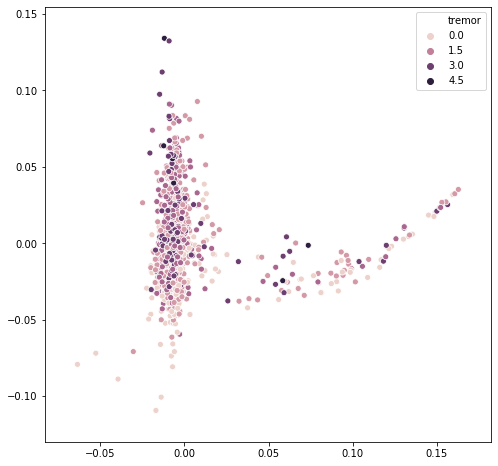

In [486]:
from sklearn.decomposition import FastICA

pca = FastICA(n_components=2)
proj = pca.fit_transform(X)
fig = plt.figure(figsize=(8, 8))
sns.scatterplot(x=proj[:, 0], y=proj[:, 1], hue=df.loc[index.index].tremor.astype('str'))

In [523]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# features = scaler.fit_transform(features)
# A = kneighbors_graph(X, 2, mode='connectivity', include_self=True)

In [548]:
from mord import OrdinalRidge

model = OrdinalRidge()

In [551]:
from sklearn.linear_model import Ridge

model = Ridge()

In [542]:
from sklearn.dummy import DummyClassifier

model = DummyClassifier(strategy='most_frequent')

In [391]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

In [459]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()

In [520]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

In [386]:
features.columns[f_select.get_support()]

Index(['rms__abs_energy', 'rms__absolute_sum_of_changes',
       'rms__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"intercept"',
       'rms__change_quantiles__f_agg_"mean"__isabs_False__qh_0.6__ql_0.2',
       'rms__change_quantiles__f_agg_"mean"__isabs_True__qh_0.2__ql_0.0',
       'rms__change_quantiles__f_agg_"var"__isabs_True__qh_0.8__ql_0.6',
       'rms__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_0__w_10',
       'rms__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_10__w_10',
       'rms__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_13__w_20',
       'rms__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_6__w_2',
       'rms__fft_aggregated__aggtype_"variance"',
       'rms__fft_coefficient__coeff_24__attr_"real"',
       'rms__fft_coefficient__coeff_28__attr_"abs"',
       'rms__fft_coefficient__coeff_2__attr_"abs"',
       'rms__fft_coefficient__coeff_31__attr_"abs"',
       'rms__fft_coefficient__coeff_42__attr_"abs"',
       'rms__fft_coefficient__coeff_44__attr_"i

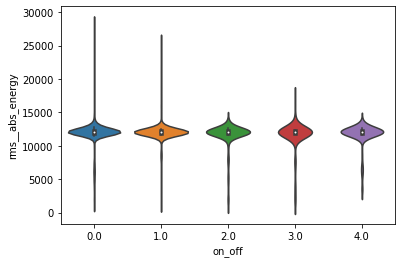

In [388]:
sns.violinplot(data=df, x='on_off', y='rms__abs_energy')

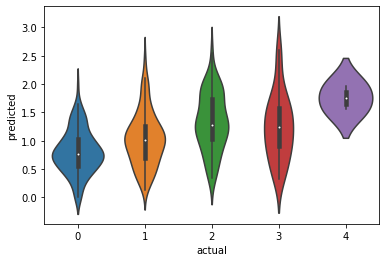

Text(0.5, 1, 'mse: 0.7913883609617033')

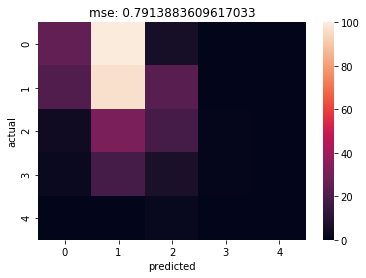

In [552]:
label = 'tremor'
features = df[df.index.isin(df.dropna(subset=[label]).index)].drop(columns=[*label_cols]) #.set_index('samp_id')
index = df[label].dropna()


f_select = feature_selection.VarianceThreshold(0.005)
# f_select = feature_selection.SelectKBest(feature_selection.mutual_info_regression, k=30)
y = df.loc[features.index, label].astype('int')
X = f_select.fit_transform(scaler.fit_transform(features), y=y)
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.25, )

model.fit(x_train, y_train, )
pred = np.clip(model.predict(x_test), 0, 4)

ax = sns.violinplot(data=pd.DataFrame({'actual': y_test, 'predicted': pred}), x='actual', y='predicted')
plt.show()

# confusion matrix
cm = metrics.confusion_matrix(y_test, np.clip(np.round(pred), 0, 4)) #, labels=y_test.unique())
ax = sns.heatmap(cm) #, xticklabels=y_test.unique(), yticklabels=y_test.unique())
ax.set_xlabel('predicted')
mse = metrics.mean_squared_error(y_test, np.clip(pred, 0, 4))
ax.set_ylabel('actual')

ax.set_title(f'mse: {mse}')

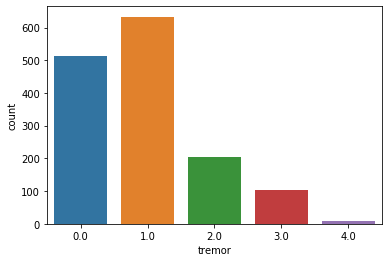

In [492]:
sns.countplot(data=labels, x='tremor')